
# BIOINFORMATIKA - Hátizsák pakolás
**Feladat:** Hátizsák pakolás, genetikus algoritmussal

* Adott n darab tárgy, mindegyiknek ismert a súlya s = (s1, s2, . . . , sn) és az értéke v = (v1, v2, . . . , vn).
* Célunk, hogy egy ismert C ∈ R+ teherbírású hátizsákba minél nagyobb
összértékű tárgyakat pakoljunk be.
* Mivel minden egyes tárgy vagy bekerül vagy nem, ezért összesen 2n féle pakolás lehetséges.
* A brute force megoldás az összeset végignézi, ez exponenciálisnál is rosszabb futásidőt jelent.
*  Ha n nagy akkor keresnünk kell jobb megoldást. Létezik egy dinamikus programozást alkalmazó eljárás, amellyel polinomidőben megoldható a feladat, ha a súlyok egészek.
* A mi esetünkben azonban más megoldást kell keresnünk, ezért ezen a feladaton keresztül megismerkedünk az evolúciós algoritmusokkal.

**Genetikus algoritmus:**
* Reprezentáció: egy n hosszú 0 − 1 sorozat. Ha az i. pozícióba 0-t írunk, akkor azon tárgy nem kerül be a hátizsákba, ha 1-et, akkor bekerül
* Fitnesz: a bekerült tárgyak összértéke, ha a súlykorlát alatt vagyunk, nulla egyébként. /Cél: ennek a maximalizálása/
* Egyed: egy lehetséges pakolás
* Populáció: lehetséges pakolások egy részhalmaza, ismétlődés előfordulhat köztük
* Genotípus: az egyedet leíró 0 − 1 sorozat
* Fenotípus: egy konkrét pakolás




---
LABOR / FELADATOK CÉLJA

```
* Kombinatorikus optimalizálást (hátizsákprobléma)
* Populációs heurisztikát (genetikus algoritmus)
* Elitizmust (a legjobb megoldások megtartása)
* Mutáció és keresztezés hatásának bemutatása
* Fitness görbék értelmezése

```

---



PSEUDOKÓD



```
# ---- Alapadatok ----
N = 30
weights = [1,10,1,10,...]           # páros index: 10, páratlan: 1
values  = [10,1,10,1,...]           # páratlan index: 10, páros: 1
capacity = 2.5 * N                  # 75

generations = 100                   # generációk száma
pop_size = 30                       # populációméret
p_cross = 0.9                       # keresztezés valószínűsége
p_mut = 0.01                        # mutáció valószínűsége (bitenként)
elit = 4                            # elit egyedek száma (elitizmus)

# ---- Segédfüggvény: fitness ----
function fitness(x):
    total_weight = sum(weights[i] * x[i])
    total_value  = sum(values[i] * x[i])
    if total_weight <= capacity:
        return total_value
    else:
        return 0                     # ha túl nehéz, érvénytelen megoldás

# ---- Fő algoritmus ----
1. Hozz létre egy kezdő populációt: véletlen 0/1 vektorok (méret: pop_size)
2. Számítsd ki minden egyed fitness értékét

3. Ismételd generations-szor:
    a) Válaszd ki a legjobb elit darabot (elitizmus)
    b) Új egyedeket készíts:
        - Válass két szülőt (pl. véletlenül)
        - Ha rand() < p_cross → végezz egypontos keresztezést
        - Mindkét utódnál minden bitre:
              ha rand() < p_mut → bitet megfordít
        - Számítsd ki az utódok fitnessét
        - Add őket az új populációhoz
    c) Az új populációhoz add vissza az elit egyedeket
    d) A populáció = új populáció

4. A legjobb egyed az, amelyiknek a legnagyobb fitness értéke van

5. Rajzold ki:
    - átlagos fitness érték generációnként (kék)
    - legjobb fitness generációnként (zöld)

```
Magyarázat:

* x = bináris vektor, hogy mely tárgyakat teszed a hátizsákba.
* fitness(x) = a hátizsák összértéke, ha nem lépi túl a kapacitást.
* Keresztezés = két szülő vektor bitjeinek cseréje.
* Mutáció = néhány bit véletlenszerű megfordítása.
* Elitizmus = a legjobbak automatikusan továbbjutnak a következő generációba.












## Hogyan álljunk neki

Minden egyed egy bináris vektor → például:
x = [1, 0, 1, 0, 1, 0, ...]
ami azt jelenti: betettem az 1., 3., 5. tárgyat.


## Az értékelés (fitness)
```
összérték = sum(values[i] * x[i])
összsúly  = sum(weights[i] * x[i])
ha összsúly <= kapacitás → fitness = összérték
különben → fitness = 0  (vagy levonás)
```
A GA keresztezi és mutálja ezeket a bináris vektorokat, hogy új kombinációkat próbáljon ki.

Tárgyak száma: 30
```
Súlyok:  [1, 10, 1, 10, 1, 10, ...]
Értékek: [10, 1, 10, 1, 10, 1, ...]
Kapacitás: 75
```
Ez azt jelenti, hogy van sok könnyű, de értékes tárgy (1-esek), és néhány nehéz, de kevésbé értékes (10-esek). A GA megpróbálja kitalálni, melyiket érdemes betenni, hogy a hátizsák értéke minél nagyobb legyen.

## Hogyan működik?

* Kezdet: véletlen 0/1 megoldások (pl. 30 bit hosszú vektorok).
* Értékelés: kiszámítjuk, mennyi a teljes érték és súly.
* Szelekció: a jobb megoldásokat előnyben részesítjük.
* Keresztezés: két jó megoldásból új kombináció.
* Mutáció: kis véletlen változtatások, hogy ne ragadjunk bele.
* Elitizmus: a legjobb néhány megoldás mindig megmarad.
* Ismétlés: 100 generáción keresztül.

## Példa végeredményre

Végül a legjobb megoldás (legmagasabb fitness) → az optimális vagy majdnem optimális hátizsák-összeállítás.
```
Legjobb egyed (x):
[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

Összsúly: 75
Összérték: 156
```

## FELADAT: KÉREK ELSŐRE MINDENKITŐL **SAJÁT** IMPLEMENTÁCIÓT
A saját implementációhoz adok egy alap kódót, hogy ha vki elakadna, legyen minimál segítség, de ez legyen csak iránymutatás a saját megoldáshoz.


Legjobb érték (fitness): 156
Összsúly: 75 / 75
Megoldás (0/1 vektor): [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]


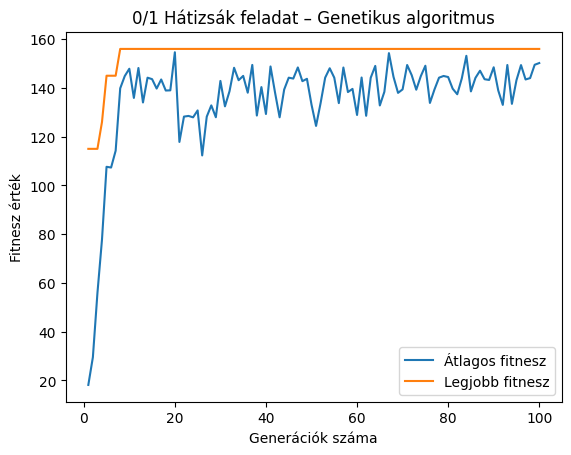

In [2]:
# ===============================================
#  0/1 HÁTIZSÁK FELADAT GENETIKUS ALGORITMUSSAL
# ===============================================

import random
import matplotlib.pyplot as plt

# ---- 1. Probléma beállítása ----
N = 30                                # tárgyak száma
weights = [1 if i % 2 == 0 else 10 for i in range(N)]  # súlyok: 1,10,1,10,...
values  = [10 if i % 2 == 0 else 1  for i in range(N)] # értékek: 10,1,10,1,...
capacity = int(2.5 * N)               # hátizsák kapacitása (75)

# ---- 2. GA paraméterek ----
generations = 100
pop_size = 30
p_cross = 0.9                         # keresztezés valószínűsége
p_mut = 0.01                          # mutáció valószínűsége
elit = 4                              # elit egyedek száma
rnd = random.Random(42)               # véletlenszám-generátor (ismételhető)

# ---- 3. Fitnesz függvény ----
def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value            # érvényes megoldás
    else:
        return 0                      # túl nehéz megoldás – érvénytelen

# ---- 4. Alapműveletek ----
def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

# ---- 5. Populáció inicializálása ----
pop = [{"x": random_solution()} for _ in range(pop_size)]
for ind in pop:
    ind["fit"] = fitness(ind["x"])

# ---- 6. GA fő ciklus ----
avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    # a) elitizmus
    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    # b) új generáció létrehozása
    newpop = []
    while len(newpop) < pop_size - elit:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]
        c1, c2 = mutate(c1), mutate(c2)
        newpop.append({"x": c1, "fit": fitness(c1)})
        if len(newpop) < pop_size - elit:
            newpop.append({"x": c2, "fit": fitness(c2)})

    # c) elit egyedek visszahelyezése
    pop = newpop + elites

# ---- 7. Eredmény ----
best = max(pop, key=lambda ind: ind["fit"])
best_weight = sum(w * xi for w, xi in zip(weights, best["x"]))
print("Legjobb érték (fitness):", best["fit"])
print("Összsúly:", best_weight, "/", capacity)
print("Megoldás (0/1 vektor):", best["x"])

# ---- 8. Grafikus ábrázolás ----
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("0/1 Hátizsák feladat – Genetikus algoritmus")
plt.legend()
plt.show()



## 1) FELADAT (könnyű) – Eredeti feladat kicsit módosítva


```
* N = 40
* Súlyok: [2, 9, 2, 9, …]
* Értékek: [9, 2, 9, 2, …]
* Kapacitás: 0.45 * sum(weights)
* GA: gen=120, pop=40, pc=0.85, pm=0.015, elit=4
```
Cél: találd meg a legjobb érvényes 0/1 megoldást; hasonlítsd a kihozott értéket a greedy (érték/súly szerint) megoldáshoz.

## 2) FELADAT (közepes) – Korreltált (realisztikus) feladatfelvetés


```
* N = 60
* Súlyok: véletlen egész [1..15]
* Értékek: values[i] = weights[i] + U(0..5) (kisebb zaj)
* Kapacitás: 0.40 * sum(weights)
* GA: gen=150, pop=60, pc=0.9, pm=0.01, elit=6
```
Cél: vizsgáld meg, nő-e az átlagos fitnesz stabilan; dokumentáld a legjobb megoldás súlyát/értékét és a kihasználtságot (%).

## 3) FELADAT (közepes) – „Csapdás” elemek


```
* N = 50
* Súlyok: véletlen [1..12], minden 5. tétel súly=15
* Értékek: véletlen [1..10], minden 5. tétel érték=5 (rossz arány)
* Kapacitás: 0.33 * sum(weights)
* GA: gen=200, pop=50, pc=0.9, pm=0.015, elit=5, kiválasztás: 3-as torna
```
Cél: bizonyítsd, hogy a GA elkerüli a csapdát (5. elemek ritkán legyenek 1-ek a legjobban).

## 4) FELADAT (haladó) – Bounded knapsack (0/1/2 darab)


```
* N = 35
* Súlyok: [1..10] véletlen
* Értékek: [3..20] véletlen
* Kapacitás: 0.50 * sum(weights) (ha mindenből max 1 lenne)
* Döntési változó: x_i ∈ {0,1,2} (kódolás: 2 bit/item vagy egy 0/1/2 gén)
* GA: gen=180, pop=50, pc=0.85, pm=0.02, elit=5
```
Cél: alakítsd át a mutációt/keresztezést, hogy 0/1/2 értékeket kezeljen; használj repair-t, ha túlterhel.

## 5) FELADAT (haladó) – 2D knapsack (súly + térfogat)


```
* N = 45
* Súlyok: [2..12], Térfogat: [1..8]
* Értékek: [5..20]
* Kapacitások: sum(weights)*0.45, sum(volumes)*0.50
* GA: gen=220, pop=60, pc=0.9, pm=0.012, elit=6, crossover: kétpontos
```
Cél: módosítsd a fitness-t, hogy mindkét korlátot betartsa (vagy büntesse külön-külön).

## 6) FELADAT (extra) – „Puha” korlát büntetéssel


```
* N = 50
* Súlyok: [1..10], Értékek: [5..25]
* Kapacitás: 0.4 * sum(weights)
* Fitness: total_value - λ * max(0, total_weight - C) (pl. λ=10..100)
* GA: gen=200, pop=50, pc=0.9, pm=0.01, elit=5, crossover: uniform (p=0.5)
```
Cél: érzékenységi vizsgálat λ-ra (mikor kezdi szisztematikusan elkerülni a túlsúlyt?).

Ellenőrző feladatok:
* Írd le, milyen kromoszóma-kódolást használsz (0/1, 0/1/2, többdimenziós).
* Mutasd meg 3 futás átlagát és szórását (más random seed).
* Készíts érzékenységi vizsgálatot: pm ∈ {0.005, 0.01, 0.02}, pc ∈ {0.8, 0.9}, elit ∈ {2,4,6}.
* Hasonlíts a greedy heurisztikához és írd le, mikor gyengébb/erősebb a GA.
* (2D/penalty) Rajzold meg, hogyan változik a legjobb megoldás a kapacitás növelésével (C-sweep).